In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
import keras

from matplotlib import pyplot
# Define column name of the label vector

# Transform the labels from String to Integer via LabelEncoder

# Add a new column to the existing DataFrame with the encoded values


In [ ]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_1(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  #data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Lying"}, 'sed')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data


In [ ]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_2(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data


In [ ]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_3(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Lying","Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data

In [3]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()

def red_data_4(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  data = data.replace({'Activity': "Lying"}, 'sed')
  data = data.replace({'Activity': "Reclining"}, 'sed')
  data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["sed",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data

In [4]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Time'], data['X'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['Y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['Z'], 'Z-Axis')
    plot_axis(ax3, data['Time'], data['Angle'], 'Angle')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(True)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


from scipy import stats
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X'].values[i: i + time_steps]
        ys = df['Y'].values[i: i + time_steps]
        zs = df['Z'].values[i: i + time_steps]
        angle = df['Angle'].values[i: i + time_steps]
        u5 = df['Unnamed: 5'].values[i: i + time_steps]
        u6= df['Unnamed: 6'].values[i: i + time_steps]
        u7= df['Unnamed: 7'].values[i: i + time_steps]
        u8= df['Unnamed: 8'].values[i: i + time_steps]
        u9= df['Unnamed: 9'].values[i: i + time_steps]
        u10= df['Unnamed: 10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs,angle,u5,u6,u7,u8,u9,u10 ])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels


In [5]:
def Trans(df_train):
  pd.options.mode.chained_assignment = None  # default='warn'
  df_train['X'] = df_train['X'] / df_train['X'].max()
  df_train['Z'] = df_train['Z'] / df_train['Z'].max()
  df_train['Y'] = df_train['Y']/ df_train['Y'].max()
  df_train['Angle'] = df_train['Angle']/ df_train['Angle'].max()
  df_train['Unnamed: 5'] = df_train['Unnamed: 5']/ df_train['Unnamed: 5'].max()
  df_train['Unnamed: 6'] = df_train['Unnamed: 6']/ df_train['Unnamed: 6'].max()
  df_train['Unnamed: 7'] = df_train['Unnamed: 7']/ df_train['Unnamed: 7'].max()
  df_train['Unnamed: 8'] = df_train['Unnamed: 8']/ df_train['Unnamed: 8'].max()
  df_train['Unnamed: 9'] = df_train['Unnamed: 9']/ df_train['Unnamed: 9'].max()
  df_train['Unnamed: 10'] = df_train['Unnamed: 10']/ df_train['Unnamed: 10'].max()
  # Round numbers
  return df_train

In [6]:
# reading data
red_data = red_data_4
df1 = red_data("DF2.csv", le)
df1 = Trans(df1)

df2 = red_data("DF3.csv", le)
df2 = Trans(df2)

df3 = red_data("DF4.csv", le)
df3 = Trans(df3)

df4 = red_data("DF5.csv", le)
df4 = Trans(df4)

df5 = red_data("01.csv", le)
df5 = Trans(df5)

df6 = red_data("02.csv", le)
df6 = Trans(df6)

df7 = red_data("03.csv", le)


File name is *******> DF2.csv
['Sitting' 'switch' 'Switch' 'Reclining' 'Standing' 'discard' 'Walking'
 'Lying' 'half squats' 'calf raises' 'leg kick backs' 'half squat'
 'Discard']

**after filtering data**
['sed' 'Standing' 'Walking']

File name is *******> DF3.csv
['Sitting' 'Switch' 'Reclining' 'Standing' 'discard' 'switch' 'Walking'
 'Lying' 'half squats' 'calf raises' 'leg kick backs' 'half squat' nan
 'single leg straight leg kick backs' 'Discard']

**after filtering data**
['sed' 'Standing' 'Walking']

File name is *******> DF4.csv
['discard' 'Sitting' 'Switch' 'Reclining' 'Standing' 'Walking' 'Lying'
 'Discard' 'half squats' 'calf raises' 'leg kick backs' 'half squat']

**after filtering data**
['sed' 'Standing' 'Walking']

File name is *******> DF5.csv
['Preparation (discard)' 'Sitting' 'Switch' 'Standing' 'Standing '
 'Walking' 'Lying' 'Discard' 'discard' 'half squats' 'calf raises'
 'leg kick backs']

**after filtering data**
['sed' 'Standing' 'Walking']

File name is ******

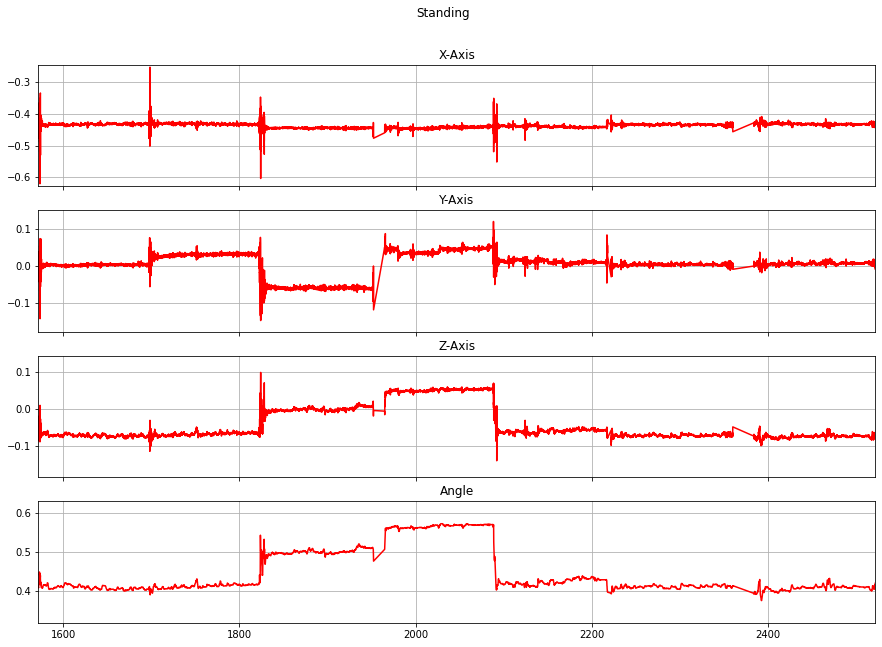

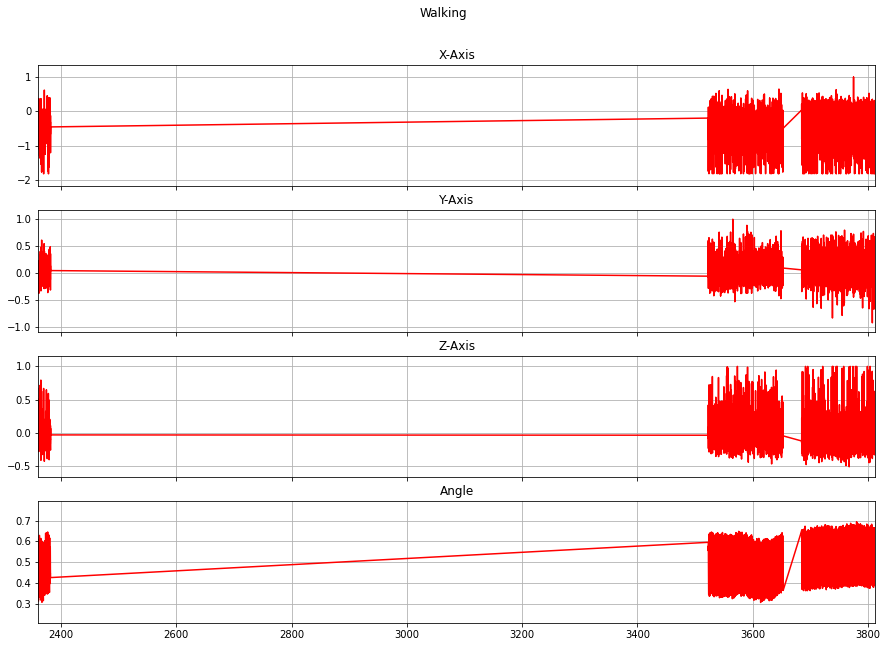

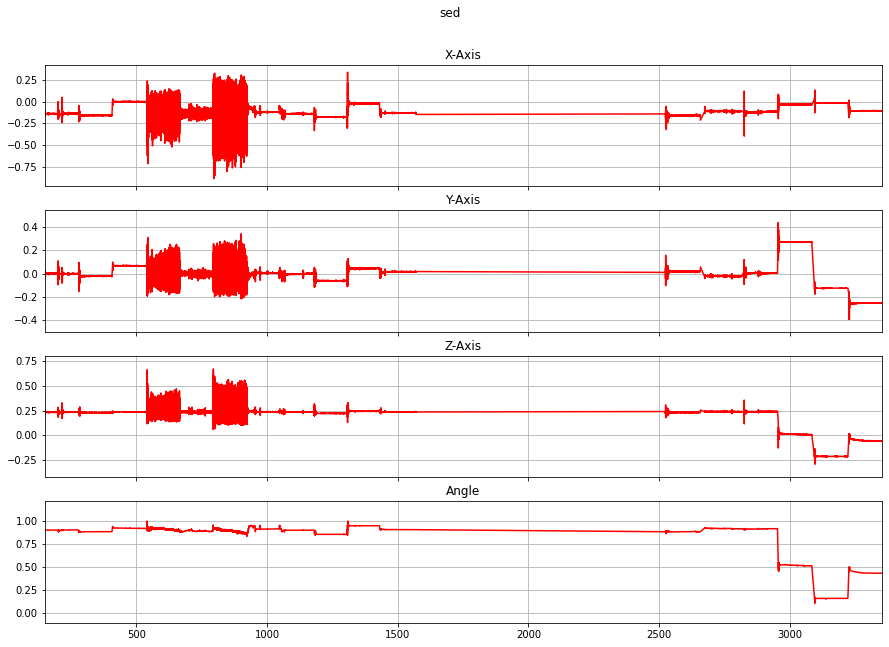

In [7]:
# Plot data

a = df1
for activity in np.unique(a['Activity']):
    subset = a[a['Activity'] == activity]
    plot_activity(activity, subset)


In [8]:
%%time
frames = [df1, df2, df3,df4,df5,df6]
result = pd.concat(frames)

#result=result.reset_index()

# The number of steps within one time segment
TIME_PERIODS = 35
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1

x_train, y_train = create_segments_and_labels(result,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_val, y_val = create_segments_and_labels(df7,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

CPU times: user 2min 51s, sys: 5.09 s, total: 2min 56s
Wall time: 2min 51s


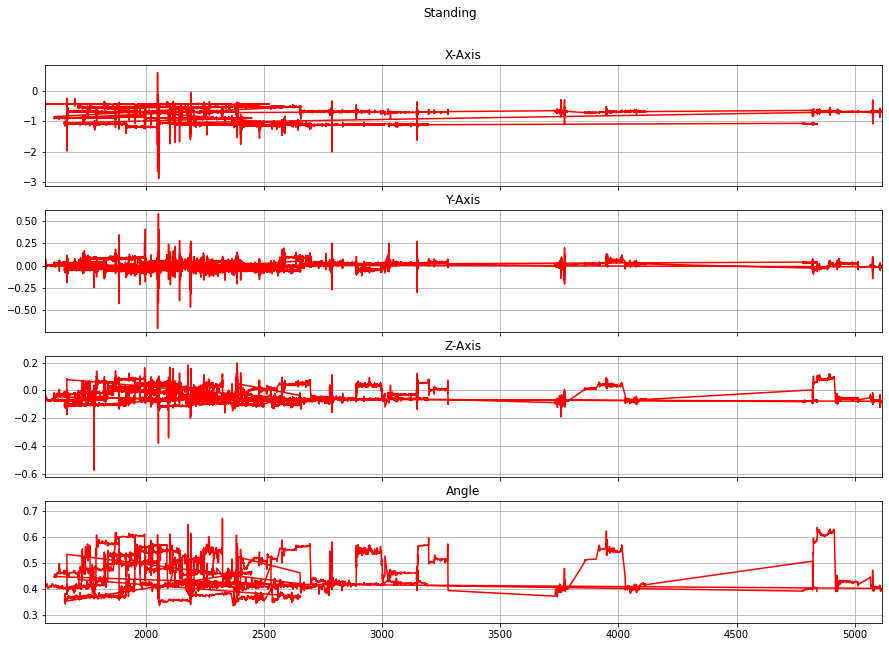

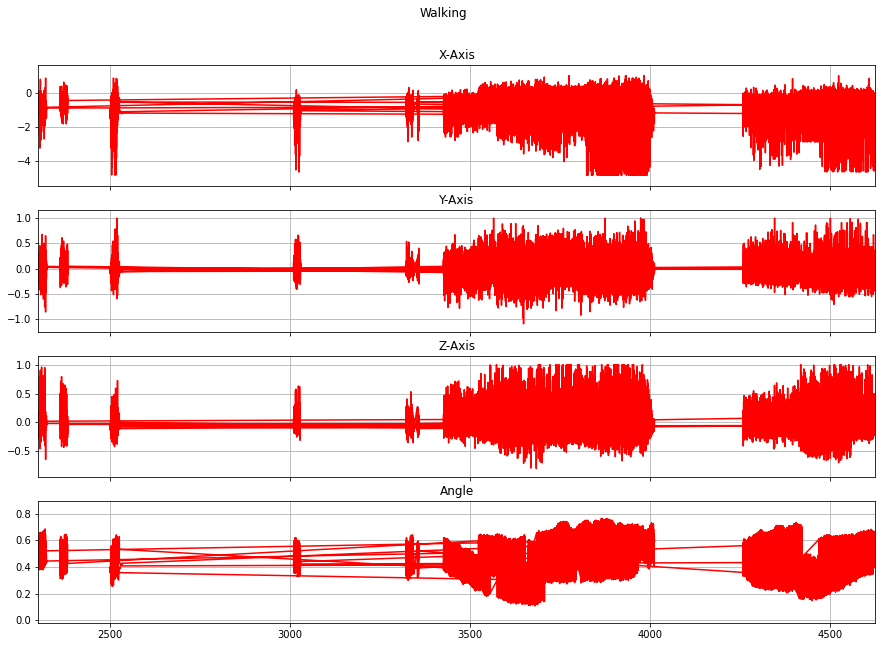

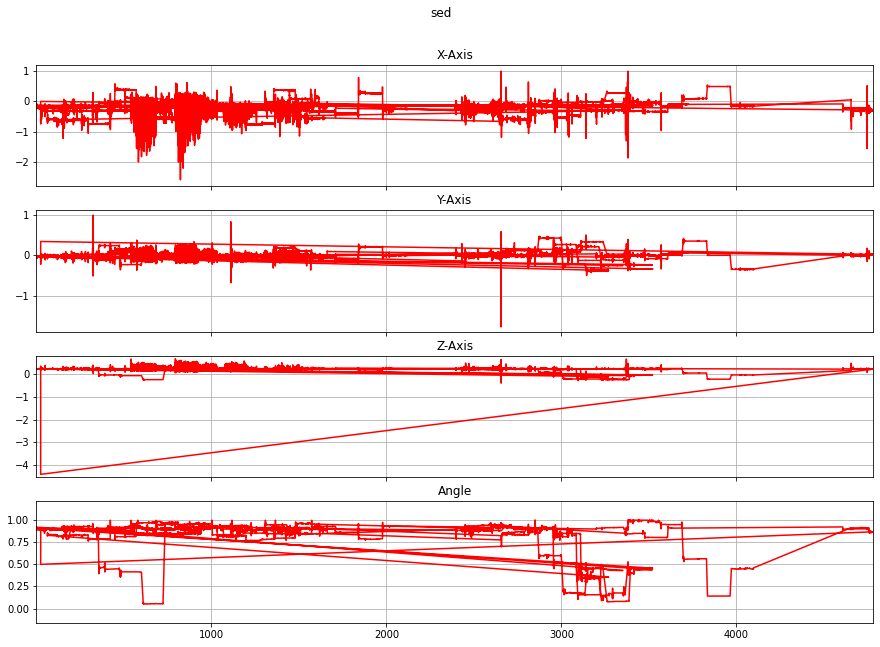

In [9]:
a = result
for activity in np.unique(a['Activity']):
    subset = a[a['Activity'] == activity]
    plot_activity(activity, subset)

In [10]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

# Set input & output dimensions
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

x_train shape:  (617494, 35, 10)
617494 training samples
y_train shape:  (617494,)
['Standing', 'Walking', 'sed']
x_train shape: (617494, 350)
input_shape: 350


In [11]:
y_train_hot = np_utils.to_categorical(y_train, 3)
print('New y_train shape: ', y_train_hot.shape)

y_val_hot = np_utils.to_categorical(y_val, 3)
print('New y_train shape: ', y_val_hot.shape)

New y_train shape:  (617494, 3)
New y_train shape:  (121393, 3)


In [20]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network

model_m.add(Reshape((TIME_PERIODS, 10), input_shape=(input_shape,)))

model_m.add(Dense(1024, activation='relu'))
model_m.add(Dense(512, activation='relu'))
model_m.add(Dense(100, activation='relu'))

model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

opt = keras.optimizers.Adam(learning_rate= 0.0001) 
model_m.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])
# Hyper-parameters
BATCH_SIZE = 128
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=50,
                      validation_data = (x_val, y_val_hot))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 35, 10)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 35, 1024)          11264     
_________________________________________________________________
dense_5 (Dense)              (None, 35, 512)           524800    
_________________________________________________________________
dense_6 (Dense)              (None, 35, 100)           51300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 10503     
Total params: 597,867
Trainable params: 597,867
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: ignored

In [ ]:
df1[df1.ActivityEncoded == 1]

9.csv
9.csv


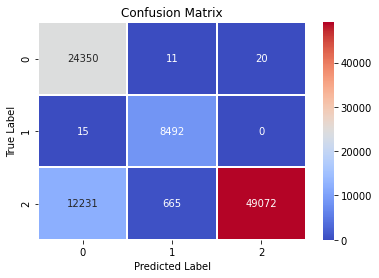

***************************   9.csv   ***************************
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     24381
           1       0.93      1.00      0.96      8507
           2       1.00      0.79      0.88     61968

    accuracy                           0.86     94856
   macro avg       0.86      0.93      0.88     94856
weighted avg       0.91      0.86      0.87     94856

15.csv
15.csv


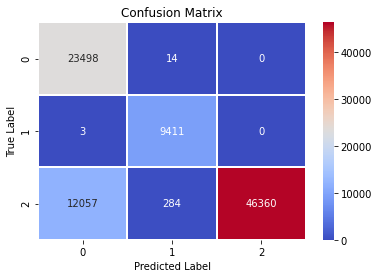

***************************   15.csv   ***************************
              precision    recall  f1-score   support

           0       0.66      1.00      0.80     23512
           1       0.97      1.00      0.98      9414
           2       1.00      0.79      0.88     58701

    accuracy                           0.87     91627
   macro avg       0.88      0.93      0.89     91627
weighted avg       0.91      0.87      0.87     91627

13.csv
13.csv


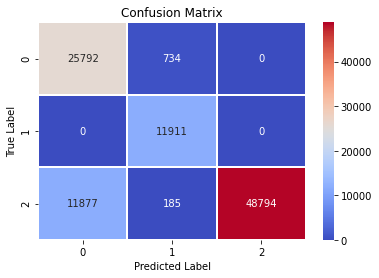

***************************   13.csv   ***************************
              precision    recall  f1-score   support

           0       0.68      0.97      0.80     26526
           1       0.93      1.00      0.96     11911
           2       1.00      0.80      0.89     60856

    accuracy                           0.87     99293
   macro avg       0.87      0.92      0.89     99293
weighted avg       0.91      0.87      0.88     99293

11.csv
11.csv


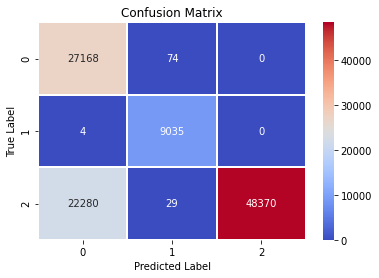

***************************   11.csv   ***************************
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     27242
           1       0.99      1.00      0.99      9039
           2       1.00      0.68      0.81     70679

    accuracy                           0.79    106960
   macro avg       0.85      0.89      0.84    106960
weighted avg       0.88      0.79      0.80    106960

10.csv
10.csv


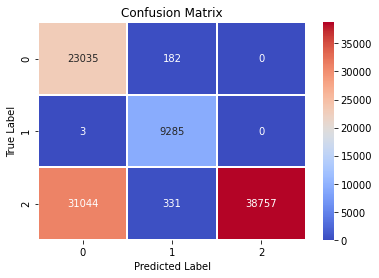

***************************   10.csv   ***************************
              precision    recall  f1-score   support

           0       0.43      0.99      0.60     23217
           1       0.95      1.00      0.97      9288
           2       1.00      0.55      0.71     70132

    accuracy                           0.69    102637
   macro avg       0.79      0.85      0.76    102637
weighted avg       0.87      0.69      0.71    102637

06.csv
06.csv


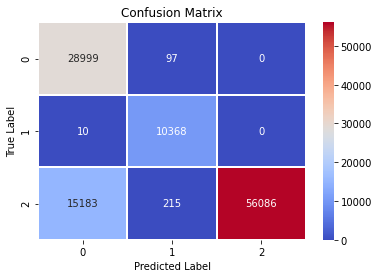

***************************   06.csv   ***************************
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     29096
           1       0.97      1.00      0.98     10378
           2       1.00      0.78      0.88     71484

    accuracy                           0.86    110958
   macro avg       0.88      0.93      0.89    110958
weighted avg       0.91      0.86      0.87    110958

05.csv
05.csv


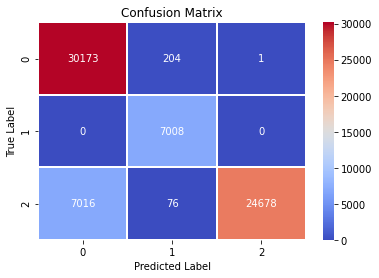

***************************   05.csv   ***************************
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     30378
           1       0.96      1.00      0.98      7008
           2       1.00      0.78      0.87     31770

    accuracy                           0.89     69156
   macro avg       0.92      0.92      0.92     69156
weighted avg       0.91      0.89      0.89     69156



In [13]:
# Test datasets

import seaborn as sns
#frames = [pd.read_csv("02.csv"), pd.read_csv("10.csv"), pd.read_csv("11.csv")]
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

test_datasets = ["9.csv","15.csv","13.csv","11.csv","10.csv","06.csv","05.csv"]


for i in test_datasets:
  data= pd.read_csv(i)
  data = data.dropna()
  print(i)
  data = data.replace({'Activity': "Reclining"}, 'sed')
  data = data.replace({'Activity': "Lying"}, 'sed')
  data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["sed",'Standing',"Walking"])]

 
  #data = data.loc[data['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]

  print(i)
 
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  df_test = data

  x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


  y_pred_test = model_m.predict(x_test)
  # Take the class with the highest probability from the test predictions
  max_y_pred_test = np.argmax(y_pred_test, axis=1)


  show_confusion_matrix(y_test, max_y_pred_test)
  print("***************************   " + i + "   ***************************" )
  print(classification_report(y_test, max_y_pred_test))

In [17]:

def Test_data_process(i):
  data= pd.read_csv(i)
  data = data.dropna()
  print(i)
  data = data.replace({'Activity': "Reclining"}, 'sed')
  data = data.replace({'Activity': "Lying"}, 'sed')
  data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["sed",'Standing',"Walking"])]

  #data = data.loc[data['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]

  print(i)
 
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  print(data["Activity"].unique())
  return data

test_datasets = ["9.csv","05.csv","06.csv","10.csv","11.csv","13.csv","15.csv"]

dft1=Test_data_process("9.csv")
dft2=Test_data_process("05.csv")
dft3=Test_data_process("06.csv")
dft4=Test_data_process("10.csv")
dft5=Test_data_process("11.csv")
dft6=Test_data_process("13.csv")
dft7=Test_data_process("15.csv")


9.csv
9.csv
['sed' 'Standing' 'Walking']
05.csv
05.csv
['sed' 'Standing' 'Walking']
06.csv
06.csv
['sed' 'Standing' 'Walking']
10.csv
10.csv
['sed' 'Standing' 'Walking']
11.csv
11.csv
['sed' 'Standing' 'Walking']
13.csv
13.csv
['sed' 'Standing' 'Walking']
15.csv
15.csv
['sed' 'Standing' 'Walking']


In [18]:
%%time
frames_test = [dft1, dft2, dft3,dft4,dft5,dft6,dft7]
result_test = pd.concat(frames_test)
result_test = result_test.reset_index()
result_test["Activity"].unique()

x_test, y_test = create_segments_and_labels(result_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

CPU times: user 2min 35s, sys: 3.77 s, total: 2min 39s
Wall time: 2min 45s


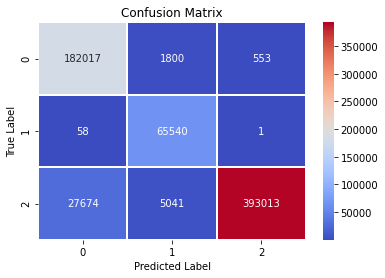

***************************   05.csv   ***************************
              precision    recall  f1-score   support

           0       0.87      0.99      0.92    184370
           1       0.91      1.00      0.95     65599
           2       1.00      0.92      0.96    425728

    accuracy                           0.95    675697
   macro avg       0.92      0.97      0.94    675697
weighted avg       0.95      0.95      0.95    675697



In [21]:
y_pred_test = model_m.predict(x_test)
  # Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)


show_confusion_matrix(y_test, max_y_pred_test)
print("***************************   " + i + "   ***************************" )
print(classification_report(y_test, max_y_pred_test))

In [22]:

model_m.save('saved_model/my_model_4')

INFO:tensorflow:Assets written to: saved_model/my_model_4/assets


In [23]:
! tar -czvf model_3.tar.gz saved_model/my_model_4

saved_model/my_model_4/
saved_model/my_model_4/saved_model.pb
saved_model/my_model_4/assets/
saved_model/my_model_4/variables/
saved_model/my_model_4/variables/variables.index
saved_model/my_model_4/variables/variables.data-00000-of-00001
saved_model/my_model_4/keras_metadata.pb
